# ÁRBOLES DE DECISIÓN
Regresor

### Pasos iniciales

Importamos librerías necesarias

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Cargamos el dataset boston

In [2]:
boston= pd.read_csv(r'./datasets/bostonDataset.csv')
boston.head()

,TOWN,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,Nahant,2011,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3
1,Swampscott,2021,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,Swampscott,2022,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,Marblehead,2031,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,Marblehead,2032,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7


In [3]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   TRACT    506 non-null    int64  
 2   LON      506 non-null    float64
 3   LAT      506 non-null    float64
 4   MEDV     506 non-null    float64
 5   CRIM     506 non-null    float64
 6   ZN       506 non-null    float64
 7   INDUS    506 non-null    float64
 8   CHAS     506 non-null    int64  
 9   NOX      506 non-null    float64
 10  RM       506 non-null    float64
 11  AGE      506 non-null    float64
 12  DIS      506 non-null    float64
 13  RAD      506 non-null    int64  
 14  TAX      506 non-null    int64  
 15  PTRATIO  506 non-null    float64
dtypes: float64(11), int64(4), object(1)
memory usage: 63.4+ KB


Establecemos las variables que actuarán como variables independientes y cúal será la variable objetivo o de salida

In [4]:
X= boston.drop(['MEDV', 'TOWN'],axis=1)
y= boston['MEDV']

In [5]:
X.head()

,TRACT,LON,LAT,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,2011,-70.955,42.2550,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3
1,2021,-70.950,42.2875,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,2022,-70.936,42.2830,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,2031,-70.928,42.2930,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,2032,-70.922,42.2980,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7


In [6]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

### Partición de los conjuntos TRAIN y TEST

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Construcción del modelo del Regresor Árbol de Decisión y entrenamiento del mismo

In [8]:
regressor = DecisionTreeRegressor(max_depth=3) # Indicamos que el árbol alcance una profundidad máxima de 3 nodos de decisión. Esto ayuda a evitar overfitting y mejora la "generalización". Nota: si no indicamos nada, el score del test puede llegar a salir = 1.0!!!
regressor= regressor.fit(X_train, y_train)

## Predicción

In [9]:
y_pred = regressor.predict(X_test)

## Evaluación del modelo

In [10]:
from sklearn.metrics import  mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
r2= r2_score(y_test, y_pred)
print(f"Root Mean Squared Error: {r2:.2f}")
print('Train Score: ', regressor.score(X_train, y_train))
print('Test Score: ', regressor.score(X_test, y_test))

Mean Squared Error: 17.33
Root Mean Squared Error: 0.76
Train Score:  0.772003326875499
Test Score:  0.7649952911507536


## Visualización del árbol de decisión utilizado

In [16]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus # instalar en anaconda, por consola usando: conda install -c conda-forge pydotplus

## ¡IMPORTANTE!    

Ejecutar en terminal:

apt-get update && apt-get install -y graphviz

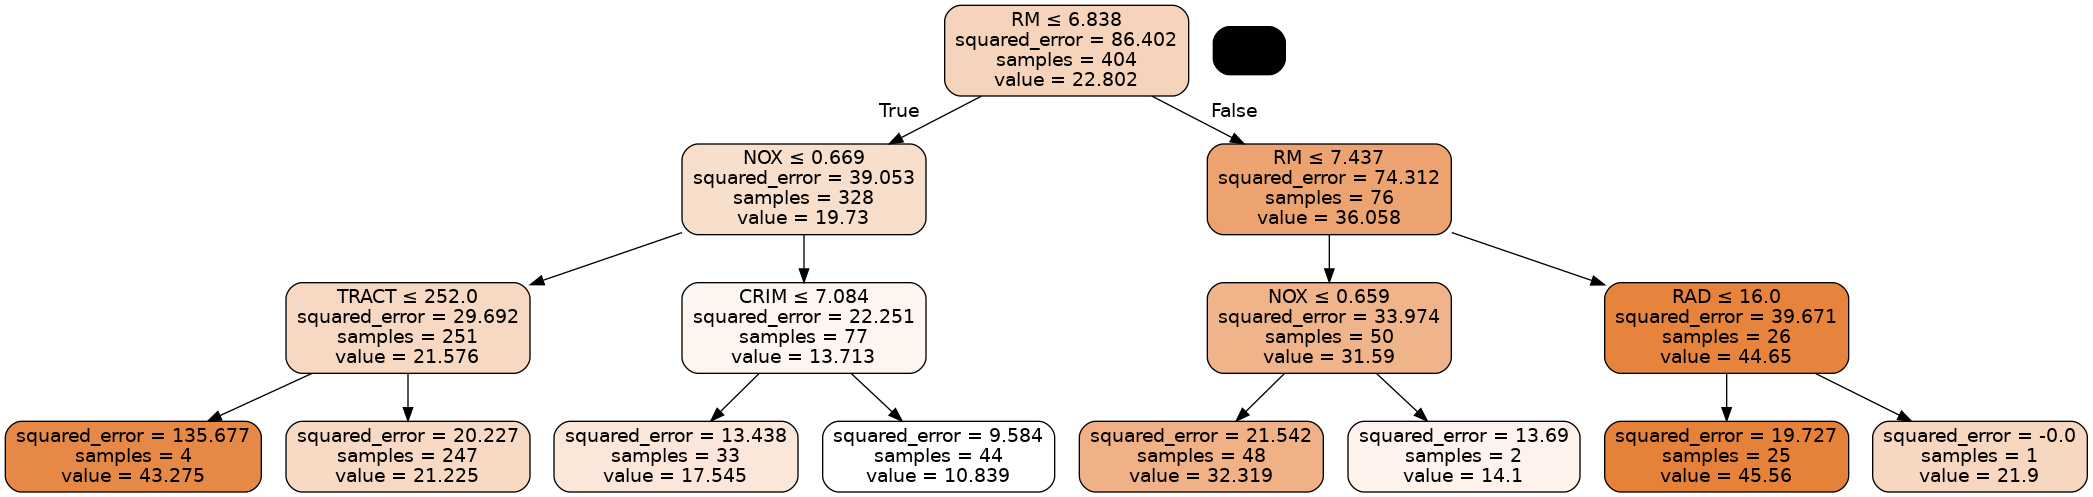

In [18]:
dot_data = StringIO()
export_graphviz(regressor, 
                out_file=dot_data, 
                feature_names=X.columns, 
                class_names=y,
                filled=True,
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Boston Housing Price Predictions.png')
Image(graph.create_png())